In [1]:
import pandas as pd
import numpy as py
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#导入数据
text_ana = pd.read_csv('text_analysis_twitter.csv')
text_ana = text_ana.drop(['Unnamed: 0'],axis=1)
text_ana

,id,screen_name,time,link,text,source
0,881004944714866688,KamalaHarris,2017-07-01T00:22:01-04:00,https://www.twitter.com/KamalaHarris/statuses/...,Republicans are trying to steal health care fr...,Sprout Social
1,881002538341986304,MarcVeasey,2017-07-01T00:12:28-04:00,https://www.twitter.com/kylegriffin1/statuses/...,RT @kylegriffin1 Rep. Mark Veasay has introduc...,Twitter for Android
2,881001393284419584,RepPaulTonko,2017-07-01T00:07:55-04:00,https://www.twitter.com/RepPaulTonko/statuses/...,A top U.S. science office went dark tonight. N...,Twitter for iPhone
3,881000301007958016,clairecmc,2017-07-01T00:03:34-04:00,https://www.twitter.com/clairecmc/statuses/881...,So the fundraising quarter ends in an hour in ...,Twitter for iPad
4,881015727540637696,tedcruz,2017-07-01T01:04:52-04:00,https://www.twitter.com/larry_kudlow/statuses/...,RT @larry_kudlow Important story @SenTedCruz @...,Twitter for iPhone
...,...,...,...,...,...,...
299995,939743413909549056,RepTedLieu,2017-12-10T01:27:44-05:00,https://www.twitter.com/ReadyLA/statuses/93956...,RT @ReadyLA REPORT FIRE DAMAGE from #CreekFire...,Twitter for iPhone
299996,939743003203301376,RepTedLieu,2017-12-10T01:26:06-05:00,https://www.twitter.com/LAFDtalk/statuses/9397...,RT @LAFDtalk Once a wildfire has burned throug...,Twitter for iPhone
299997,939741567706730497,JuliaBrownley26,2017-12-10T01:20:23-05:00,https://www.twitter.com/SCE/statuses/939739240...,"RT @SCE Update: As of 8:30pm, Saturday, about ...",Twitter Web Client
299998,939739240501596160,SteveKnight25,2017-12-10T01:11:09-05:00,https://www.twitter.com/santaclarita/statuses/...,RT @santaclarita #RyeFire Evening Update (12/9...,Twitter for iPhone


In [3]:
#分析语料
text = list(text_ana['text'])
text

['Republicans are trying to steal health care from 22 million people in order to help the wealthiest 0.4%.',
 "RT @kylegriffin1 Rep. Mark Veasay has introduced a bill to ensure no taxpayer funds will be used to support Trump's Election Commission. http://pbs.twimg.com/media/DDm3PgaXcAAFBIo.jpg",
 'A top U.S. science office went dark tonight. Not good. #sciencematters https://twitter.com/elleabella1112/status/880870684485984256 QT @elleabella1112 science division out. mic drop. http://pbs.twimg.com/media/DDl7NT9XoAEeJxb.jpg',
 'So the fundraising quarter ends in an hour in MO. I would really appreciate a $5 contribution. Thank you so much. http://clairemccaskill.com/donate',
 'RT @larry_kudlow Important story @SenTedCruz @NRO. http://www.nationalreview.com/article/449134/ted-cruz-conservative-health-care-proposal?utm_campaign=trueanthem&utm_content=595717ee04d3010ccd0c715e&utm_medium=social&utm_source=twitter',
 'Threats already higher than all of 2016!  Resist! http://thehill.com/homen

In [4]:
# 数据预处理
def preprocess_text(text):
    #转换为小写
    text = text.lower()
    #移除URL
    text = re.sub(r'http\S+', '', text)
    return text

In [5]:
#初始化CountVectorizer
vectorizer = CountVectorizer()

#将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))[:10]

#展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

#展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

词袋特征矩阵的形状: (10, 121376)
特征词列表: ['00' '000' '0000' ... '투표하십시오' '한국어' 'ﬂees']


In [6]:
list(X.toarray())

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64)]

In [7]:
#词频统计
#获取词汇表
feature_words = vectorizer.get_feature_names_out()

#词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [8]:
#观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x:x[1], reverse=True)

[('to', 5),
 ('in', 4),
 ('the', 4),
 ('rt', 3),
 ('of', 2),
 ('qt', 2),
 ('science', 2),
 ('so', 2),
 ('13newsnow', 1),
 ('2016', 1),
 ('22', 1),
 ('41', 1),
 ('achieving', 1),
 ('ago', 1),
 ('airandspace', 1),
 ('all', 1),
 ('already', 1),
 ('american', 1),
 ('an', 1),
 ('appreciate', 1),
 ('are', 1),
 ('article', 1),
 ('at', 1),
 ('baseball', 1),
 ('be', 1),
 ('bill', 1),
 ('birthday', 1),
 ('by', 1),
 ('california', 1),
 ('care', 1),
 ('commission', 1),
 ('contribution', 1),
 ('cutting', 1),
 ('dark', 1),
 ('daylen', 1),
 ('dc', 1),
 ('division', 1),
 ('dream', 1),
 ('drop', 1),
 ('eastern', 1),
 ('election', 1),
 ('elleabella1112', 1),
 ('ends', 1),
 ('ensure', 1),
 ('esva', 1),
 ('event', 1),
 ('finest', 1),
 ('from', 1),
 ('fundraising', 1),
 ('funds', 1),
 ('good', 1),
 ('great', 1),
 ('happy', 1),
 ('has', 1),
 ('health', 1),
 ('help', 1),
 ('heretostay', 1),
 ('higher', 1),
 ('hour', 1),
 ('important', 1),
 ('introduced', 1),
 ('invited', 1),
 ('job', 1),
 ('kylegriffin1', 1)

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=800, 
    background_color='white', 
    font_path='simhei.ttf'
).generate_from_frequencies(word_freq)

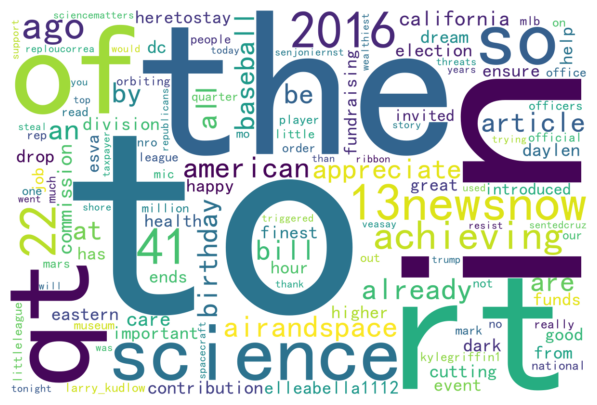

<Figure size 640x480 with 0 Axes>

In [10]:
# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)